**Dataset information**-
 This dataset have 3 classes and these are types of iris plant(Setosa, Versicolour, Virgininca)

It have 150 intances.


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Loading dataset

In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df=df.drop(columns=['Id'])

In [ ]:
df.sample(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
58,6.6,2.9,4.6,1.3,1
50,7.0,3.2,4.7,1.4,1
122,7.7,2.8,6.7,2.0,2


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## EDA

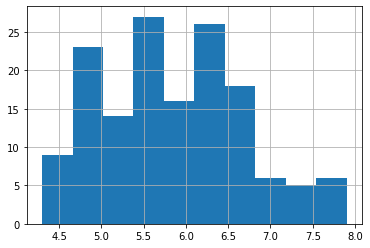

In [ ]:
df['SepalLengthCm'].hist()

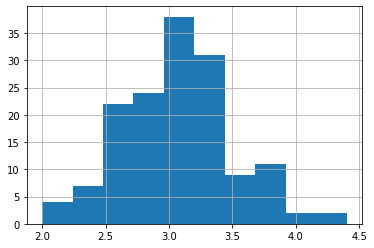

In [ ]:
df['SepalWidthCm'].hist()

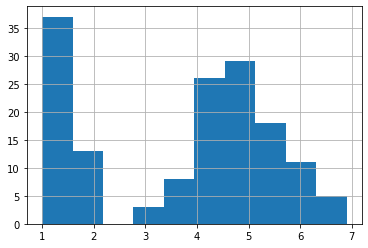

In [ ]:
df['PetalLengthCm'].hist()

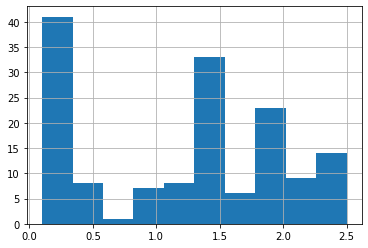

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

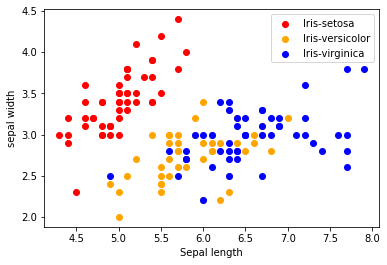

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("sepal width")
plt.legend()

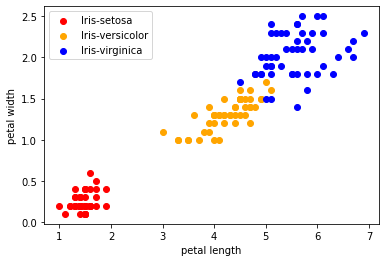

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

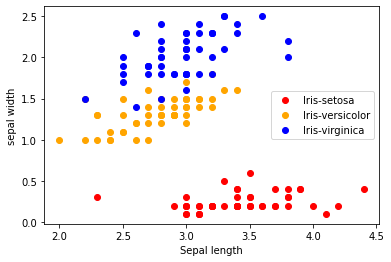

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("sepal width")
plt.legend()

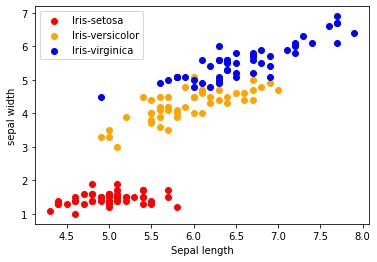

In [ ]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("sepal width")
plt.legend()

##Correlation matrix

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


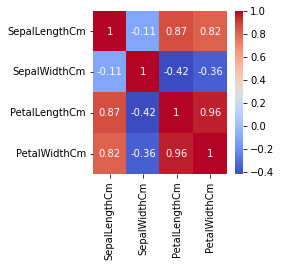

In [ ]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(3,3))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

## Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['Species']=le.fit_transform(df['Species'])
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [ ]:
model1.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print("Accuracy:",model.score(xtest,ytest)*100)

Accuracy: 97.77777777777777


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()

In [ ]:
model2.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
print("Accuracy:",model.score(xtest,ytest)*100)

Accuracy: 97.77777777777777


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()

In [ ]:
model3.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
print("Accuracy:",model.score(xtest,ytest)*100)

Accuracy: 97.77777777777777
